In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
sns.set (style= 'whitegrid', color_codes = True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [2]:
data = pd.read_csv(r"C:\Users\gradadm09\Desktop\Natalie\Wayfair-Babson_HackathonData 2019.csv")

In [3]:
data.head()

,Purchased,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,7/1/2017,2.014240e+15,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,100to250k,0,0,1,0,0,0,0
1,0,7/1/2017,2.909700e+15,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,NaN,1,0,9,0,230,0,0
2,0,7/1/2017,2.987400e+15,New Visitor,Web,WebSearch,Chrome,Windows,NaN,NaN,NaN,0,0,28,0,10412,0,0
3,0,7/1/2017,6.875970e+15,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,100to250k,1,1,8,1,430,0,0
4,0,7/1/2017,1.153490e+16,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,NaN,1,1,9,0,1158,0,0


In [4]:
data.describe()

,Purchased,UniqueVisitID,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
count,992977.000000,9.929770e+05,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000
mean,0.025445,4.608987e+18,0.509052,0.139695,13.975567,0.366073,1436.925027,0.046510,0.106376
std,0.157472,2.661529e+18,0.499918,0.346671,23.037259,0.481730,3216.872703,0.210586,0.308319
min,0.000000,1.328640e+13,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.304610e+18,0.000000,0.000000,3.000000,0.000000,38.000000,0.000000,0.000000
50%,0.000000,4.607860e+18,1.000000,0.000000,7.000000,0.000000,237.000000,0.000000,0.000000
75%,0.000000,6.913870e+18,1.000000,0.000000,16.000000,1.000000,1071.000000,0.000000,0.000000
max,1.000000,9.223330e+18,1.000000,1.000000,1217.000000,1.000000,86896.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992977 entries, 0 to 992976
Data columns (total 18 columns):
Purchased               992977 non-null int64
VisitDate               992977 non-null object
UniqueVisitID           992977 non-null float64
VisitorGroup            992977 non-null object
PlatformUsed            992977 non-null object
VisitSource             992977 non-null object
BrowserName             992977 non-null object
OSName                  992977 non-null object
State                   408261 non-null object
Gender                  639596 non-null object
IncomeRange             383272 non-null object
ViewedProductInVisit    992977 non-null int64
ViewedSaleInVisit       992977 non-null int64
TotalPageViews          992977 non-null int64
PlacedSearch            992977 non-null int64
SecondsOnSite           992977 non-null int64
ClickedBanner           992977 non-null int64
AddedToBasket           992977 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usa

In [6]:
data.columns

Index(['Purchased', 'VisitDate', 'UniqueVisitID', 'VisitorGroup',
       'PlatformUsed', 'VisitSource', 'BrowserName', 'OSName', 'State',
       'Gender', 'IncomeRange', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'AddedToBasket'],
      dtype='object')

In [7]:
data.isnull().sum()

Purchased                    0
VisitDate                    0
UniqueVisitID                0
VisitorGroup                 0
PlatformUsed                 0
VisitSource                  0
BrowserName                  0
OSName                       0
State                   584716
Gender                  353381
IncomeRange             609705
ViewedProductInVisit         0
ViewedSaleInVisit            0
TotalPageViews               0
PlacedSearch                 0
SecondsOnSite                0
ClickedBanner                0
AddedToBasket                0
dtype: int64

In [8]:
# Drop rows where income data is not available
data_income = data.dropna(axis = 0, subset=['IncomeRange']) 

## Split data set into High, Med, Low income groups

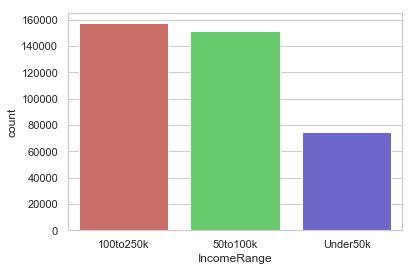

In [9]:
sns.countplot( x = 'IncomeRange', data = data_income, palette = 'hls')
# There are more high and med income people in the platform compared to low income people

In [11]:
# Divide data set into 3 groups
income_group = ['High_income','Med_income','Low_income']
High_income = data_income[data_income['IncomeRange'] == '100to250k'].drop(['IncomeRange'],axis = 1)
Med_income = data_income[data_income['IncomeRange'] == '50to100k'].drop(['IncomeRange'],axis = 1)
Low_income = data_income[data_income['IncomeRange'] == 'Under50k'].drop(['IncomeRange'],axis = 1)

In [12]:
#  Analyze price sensitivity of each data set

In [13]:
# High income group:
High_income.head()

,Purchased,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,7/1/2017,2.014240e+15,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,0,0,1,0,0,0,0
3,0,7/1/2017,6.875970e+15,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,1,1,8,1,430,0,0
12,0,7/1/2017,4.360120e+16,Prior Visitor,Web,WebSearch,Safari,iOS,CA,Female,1,0,26,1,2785,0,1
27,0,7/1/2017,1.081290e+17,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Windows,NY,Unknown,0,0,1,0,117,0,0
29,0,7/1/2017,1.165150e+17,Prior Visitor with Purchase,Phone,WebSearch,Safari,iOS,TX,Female,1,0,78,0,5813,0,0


In [16]:
High_income.describe()

,Purchased,UniqueVisitID,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
count,157395.000000,1.573950e+05,157395.000000,157395.000000,157395.000000,157395.000000,157395.000000,157395.000000,157395.000000
mean,0.066184,4.601535e+18,0.638915,0.167686,18.818673,0.475295,2181.086451,0.052575,0.189828
std,0.248604,2.663129e+18,0.480317,0.373589,28.503861,0.499391,4010.011055,0.223184,0.392166
min,0.000000,2.071920e+13,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.293050e+18,0.000000,0.000000,4.000000,0.000000,86.000000,0.000000,0.000000
50%,0.000000,4.591110e+18,1.000000,0.000000,10.000000,0.000000,481.000000,0.000000,0.000000
75%,0.000000,6.909045e+18,1.000000,0.000000,22.000000,1.000000,2176.000000,0.000000,0.000000
max,1.000000,9.223280e+18,1.000000,1.000000,895.000000,1.000000,60182.000000,1.000000,1.000000


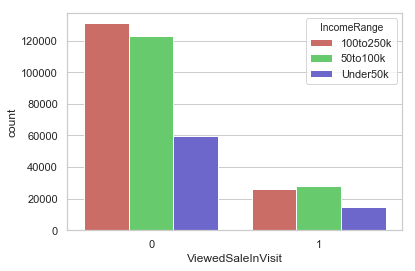

In [17]:
# Assume Viewed Sales meaning more interested in Sales
# Count whether people viewed sales in visit or not, by income group
sns.countplot(x = 'ViewedSaleInVisit', data = data_income, hue = 'IncomeRange', palette = 'hls')

C:\Users\gradadm09\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


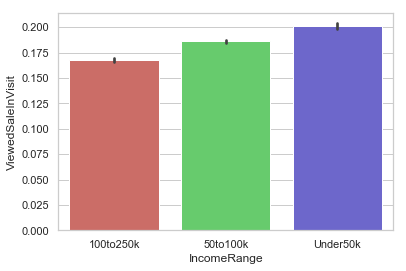

In [18]:
# Count whether people viewed sales in visit or not, by income group 
sns.barplot( x = 'IncomeRange', y = 'ViewedSaleInVisit',data = data_income, palette = 'hls')
# Low income people are more intested in Sales bc they have higher rate of viewing Sales 
#( high-income:16.5, Med income: 18.5, low income: 20%

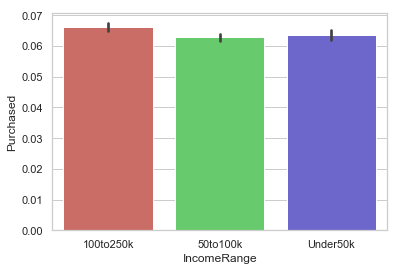

In [19]:
sns.barplot( x = 'IncomeRange', y = 'Purchased',data = data_income, palette = 'hls')


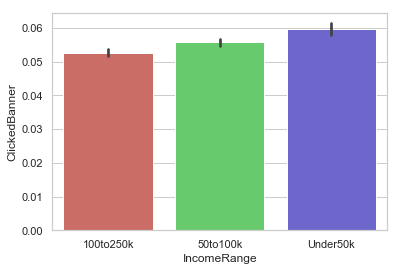

In [20]:
# Percentage of people who clicked banner, by Income Range
sns.barplot( x = 'IncomeRange', y = 'ClickedBanner',data = data_income, palette = 'hls')
# Low income people are more likely to Click on the Banner (high-income:5.2%, Med income:5.5%, low income: 6% )
# This means the offer sales and using Banner will work better with low income people

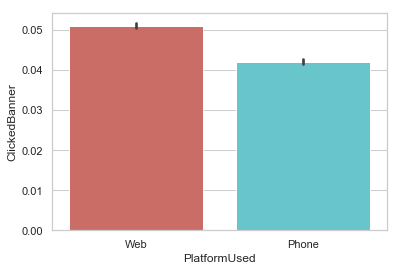

In [21]:
# Percentage of people who clicked banner, by platform they used
sns.barplot( x = 'PlatformUsed', y = 'ClickedBanner',data = data, palette = 'hls')
# People Click more when they are on the Web ( 5% Web vs. 4.1 % Phone)

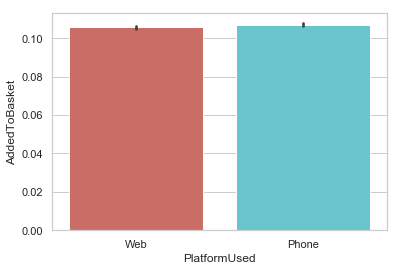

In [22]:
# # Percentage of people who clicked banner, by platform they used
sns.barplot( x = 'PlatformUsed', y = 'AddedToBasket',data = data, palette = 'hls')
# Among all people, people Add to Basket almost at the same rate when they are on the phone and on the web, both 14.2 %

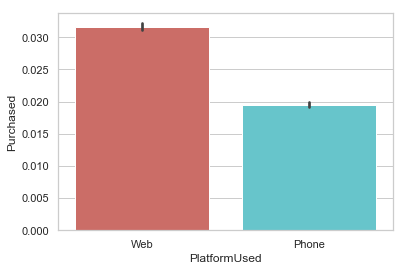

In [23]:
# Percentage of people who purchased, by platform they used
sns.barplot( x = 'PlatformUsed', y = 'Purchased',data = data, palette = 'hls')
# Among all people, people buy a lot more when they are on the Web( 3.2 %) compared to when they are on the phone (1.9%)
# same add to basket rate, but much lower purchase rate

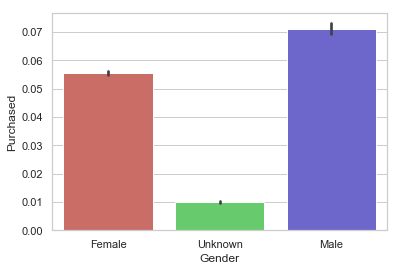

In [24]:
# # Percentage of people who purchased, by gender
sns.barplot( x = 'Gender', y = 'Purchased',data = data, palette = 'hls')
# Among all, people purchase more when they are Male, 0.055 vs 0.07 ( 5.5% vs 7.1%)

In [25]:
data_income.columns

Index(['Purchased', 'VisitDate', 'UniqueVisitID', 'VisitorGroup',
       'PlatformUsed', 'VisitSource', 'BrowserName', 'OSName', 'State',
       'Gender', 'IncomeRange', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'AddedToBasket'],
      dtype='object')

## Split data set into phone user and web user

In [26]:
phone_user = data[data['PlatformUsed'] == 'Phone']
web_user = data[data['PlatformUsed'] == 'Web']

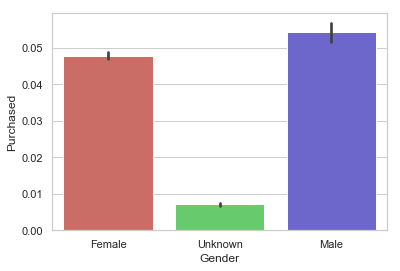

In [27]:
sns.barplot( x = 'Gender', y = 'Purchased',data = phone_user , palette = 'hls')
# Among all phone users, male purchase slightly more than women (0.054 vs. 0.047) or 5.4% vs 4.7%

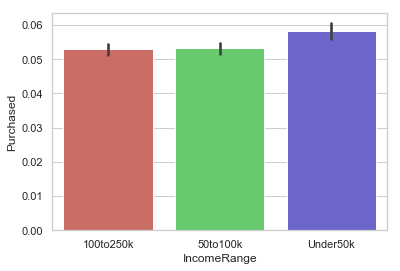

In [28]:
sns.barplot( x = 'IncomeRange', y = 'Purchased',data = phone_user , palette = 'hls')
# For phone user, low income people buy slightly a little more ( 5.8% compared to 5.2% of high or mid income)

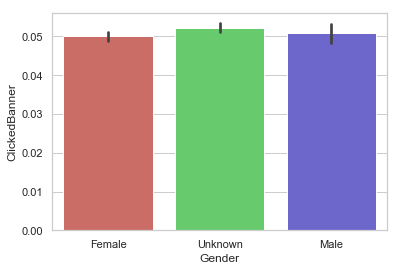

In [29]:
sns.barplot( x = 'Gender', y = 'ClickedBanner',data = phone_user , palette = 'hls')
# Among all phone users, male have the same click banner rate as women, 5%
# Male purchase more if they are using phone, they have the same rate of clicking like women on the banner.

In [30]:
#sns.barplot( x = 'Gender', y = 'ClickedBanner',data = web_user , palette = 'hls')
# Among all web users, women click to banner more( 6.1%) while men click on banner less 5.1%
# Male purchase more if they are using web, but they don't click Banner on the webas much as women.


## Split by gender

In [31]:
# Split into Male and Female group:
data_gender = data.dropna(axis = 0, subset = ['Gender'])
male = data_gender[data_gender['Gender'] == 'Male'].drop(['Gender'], axis = 1)
female = data_gender[data_gender['Gender'] == 'Female'].drop(['Gender'], axis =1)

In [32]:
# If you are Female, Clicked to Banner does explain whether you purchase or not.
# But clicked to Banner reduces the odd that you will purchase by 0.871 ( decrease)
# If you are female, if you are high income, the odd of you buying is 1.113 higher compared to mid income
# If you are female, if you are high income, the odd of you buying is 1.1 higher compared to low income


In [33]:
# Clicked Banner is  helpful in explaining the model
# decrease the odd of purchase by 0.88
# 